In [1]:
import pandas as pd
import numpy as np


import datetime as dt
from pprint import pprint
from itertools import chain

# sentiment analysis
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize, RegexpTokenizer # tokenize words
from nltk.corpus import stopwords

# visualization
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 8) # default plot size
import seaborn as sns
sns.set(style='whitegrid', palette='Dark2')
from wordcloud import WordCloud

C:\Users\adity\AppData\Local\Temp\ipykernel_8112\2591457360.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
nltk.download('vader_lexicon') # get lexicons data
nltk.download('punkt') # for tokenizer
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\adity\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\adity\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\adity\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
all_posts_df = pd.read_csv('cleaned_posts.csv')
all_posts_df['cleaned_title']

0         facebook suck  — elon musk hit back facebook...
1       google  allegedly sentient artificial intellig...
2       s thing artificial intelligence  term breed mi...
3       google engineer think artificial intelligence ...
4        year  old tablet decode artificial intelligen...
                              ...                        
4348    turkish airline ground fleet boeing max jet fo...
4349                 classic car convert electric vehicle
4350    new jailbreak john deere tractor ride right  t...
4351    car company  figure  let apple carplay take sc...
4352    rivian ceo warn loom ev battery shortage make ...
Name: cleaned_title, Length: 4353, dtype: object

In [7]:
sid = SentimentIntensityAnalyzer()
res = [*all_posts_df['cleaned_title'].apply(sid.polarity_scores)]
pprint(res[:3])


[{'compound': 0.0516, 'neg': 0.153, 'neu': 0.684, 'pos': 0.163},
 {'compound': 0.4767, 'neg': 0.0, 'neu': 0.659, 'pos': 0.341},
 {'compound': 0.2023, 'neg': 0.298, 'neu': 0.357, 'pos': 0.345}]


In [8]:
sentiment_df = pd.DataFrame.from_records(res)
all_posts_df = pd.concat([all_posts_df, sentiment_df], axis=1, join='inner')
all_posts_df.head()

,post_id,post_title,cleaned_title,neg,neu,pos,compound
0,gjzjtg,"""Facebook sucks""—Elon Musk hits back at Facebo...",facebook suck — elon musk hit back facebook...,0.153,0.684,0.163,0.0516
1,vt8du3,Google’s Allegedly Sentient Artificial Intelli...,google allegedly sentient artificial intellig...,0.000,0.659,0.341,0.4767
2,122u11v,There's No Such Thing as Artificial Intelligen...,s thing artificial intelligence term breed mi...,0.298,0.357,0.345,0.2023
3,vajoll,Google engineer thinks artificial intelligence...,google engineer think artificial intelligence ...,0.000,0.693,0.307,0.4767
4,185opxj,5000-Year-Old Tablets Can Now Be Decoded by Ar...,year old tablet decode artificial intelligen...,0.000,0.721,0.279,0.4767


In [10]:
sid = SentimentIntensityAnalyzer()
res1 = [*all_posts_df['post_title'].apply(sid.polarity_scores)]
pprint(res1[:3])


[{'compound': 0.2263, 'neg': 0.099, 'neu': 0.762, 'pos': 0.139},
 {'compound': 0.4767, 'neg': 0.0, 'neu': 0.721, 'pos': 0.279},
 {'compound': -0.128, 'neg': 0.289, 'neu': 0.482, 'pos': 0.229}]


In [11]:
sentiment_df = pd.DataFrame.from_records(res1)
all_posts_df = pd.concat([all_posts_df, sentiment_df], axis=1, join='inner')
all_posts_df.head()

,post_id,post_title,cleaned_title,neg,neu,pos,compound,neg,neu,pos,compound
0,gjzjtg,"""Facebook sucks""—Elon Musk hits back at Facebo...",facebook suck — elon musk hit back facebook...,0.153,0.684,0.163,0.0516,0.099,0.762,0.139,0.2263
1,vt8du3,Google’s Allegedly Sentient Artificial Intelli...,google allegedly sentient artificial intellig...,0.000,0.659,0.341,0.4767,0.000,0.721,0.279,0.4767
2,122u11v,There's No Such Thing as Artificial Intelligen...,s thing artificial intelligence term breed mi...,0.298,0.357,0.345,0.2023,0.289,0.482,0.229,-0.1280
3,vajoll,Google engineer thinks artificial intelligence...,google engineer think artificial intelligence ...,0.000,0.693,0.307,0.4767,0.000,0.721,0.279,0.4767
4,185opxj,5000-Year-Old Tablets Can Now Be Decoded by Ar...,year old tablet decode artificial intelligen...,0.000,0.721,0.279,0.4767,0.000,0.780,0.220,0.4767


In [12]:
columns_to_drop = ['neg', 'neu', 'pos', 'compound']
all_posts_df.drop(columns=columns_to_drop, inplace=True)


In [13]:
all_posts_df

,post_id,post_title,cleaned_title
0,gjzjtg,"""Facebook sucks""—Elon Musk hits back at Facebo...",facebook suck — elon musk hit back facebook...
1,vt8du3,Google’s Allegedly Sentient Artificial Intelli...,google allegedly sentient artificial intellig...
2,122u11v,There's No Such Thing as Artificial Intelligen...,s thing artificial intelligence term breed mi...
3,vajoll,Google engineer thinks artificial intelligence...,google engineer think artificial intelligence ...
4,185opxj,5000-Year-Old Tablets Can Now Be Decoded by Ar...,year old tablet decode artificial intelligen...
...,...,...,...
4348,190nstp,Turkish Airlines grounds its fleet of Boeing 7...,turkish airline ground fleet boeing max jet fo...
4349,q12prn,The classic cars being converted to electric v...,classic car convert electric vehicle
4350,woagum,A New Jailbreak for John Deere Tractors Rides ...,new jailbreak john deere tractor ride right t...
4351,v71tux,Car companies haven’t figured out if they’ll l...,car company figure let apple carplay take sc...


In [4]:
sid = SentimentIntensityAnalyzer()
res = [*all_posts_df['cleaned_title'].apply(sid.polarity_scores)]
pprint(res[:3])


[{'compound': 0.0516, 'neg': 0.153, 'neu': 0.684, 'pos': 0.163},
 {'compound': 0.4767, 'neg': 0.0, 'neu': 0.659, 'pos': 0.341},
 {'compound': 0.2023, 'neg': 0.298, 'neu': 0.357, 'pos': 0.345}]


In [5]:
sentiment_df = pd.DataFrame.from_records(res)
all_posts_df = pd.concat([all_posts_df, sentiment_df], axis=1, join='inner')
all_posts_df.head()

,post_id,post_title,cleaned_title,neg,neu,pos,compound
0,gjzjtg,"""Facebook sucks""—Elon Musk hits back at Facebo...",facebook suck — elon musk hit back facebook...,0.153,0.684,0.163,0.0516
1,vt8du3,Google’s Allegedly Sentient Artificial Intelli...,google allegedly sentient artificial intellig...,0.000,0.659,0.341,0.4767
2,122u11v,There's No Such Thing as Artificial Intelligen...,s thing artificial intelligence term breed mi...,0.298,0.357,0.345,0.2023
3,vajoll,Google engineer thinks artificial intelligence...,google engineer think artificial intelligence ...,0.000,0.693,0.307,0.4767
4,185opxj,5000-Year-Old Tablets Can Now Be Decoded by Ar...,year old tablet decode artificial intelligen...,0.000,0.721,0.279,0.4767


In [ ]:
#Our dataframe consists of four columns from the sentiment scoring: Neu, Neg, Pos and compound. 
#The first three represent the sentiment score percentage of each category in our headline, and the compound single number that scores the sentiment. `compound` ranges from -1 (Extremely Negative) to 1 (Extremely Positive).

#We will consider posts with a compound value greater than 0.2 as positive and less than -0.2 as negative. There's some testing and experimentation that goes with choosing these ranges, and there is a trade-off to be made here. If you choose a higher value, you might get more compact results (less false positives and false negatives), but the size of the results will decrease significantly.

#Let's create a positive label of 1 if the compound is greater than 0.2, and a label of -1 if compound is less than -0.2. Everything else will be 0.

In [6]:
THRESHOLD = 0.2

conditions = [
    (all_posts_df['compound'] <= -THRESHOLD),
    (all_posts_df['compound'] > -THRESHOLD) & (all_posts_df['compound'] < THRESHOLD),
    (all_posts_df['compound'] >= THRESHOLD),
    ]

values = ["neg", "neu", "pos"]
all_posts_df['label'] = np.select(conditions, values)

all_posts_df.head()

,post_id,post_title,cleaned_title,neg,neu,pos,compound,label
0,gjzjtg,"""Facebook sucks""—Elon Musk hits back at Facebo...",facebook suck — elon musk hit back facebook...,0.153,0.684,0.163,0.0516,neu
1,vt8du3,Google’s Allegedly Sentient Artificial Intelli...,google allegedly sentient artificial intellig...,0.000,0.659,0.341,0.4767,pos
2,122u11v,There's No Such Thing as Artificial Intelligen...,s thing artificial intelligence term breed mi...,0.298,0.357,0.345,0.2023,pos
3,vajoll,Google engineer thinks artificial intelligence...,google engineer think artificial intelligence ...,0.000,0.693,0.307,0.4767,pos
4,185opxj,5000-Year-Old Tablets Can Now Be Decoded by Ar...,year old tablet decode artificial intelligen...,0.000,0.721,0.279,0.4767,pos


In [17]:
#Vader on Individual Words

In [7]:
sentence0 = all_posts_df.cleaned_title.iloc[0]
print(sentence0)
words0 = all_posts_df.cleaned_title.iloc[0].split()
print(words0)

pos_list, neg_list, neu_list = [], [], []

for word in words0:
  if (sid.polarity_scores(word)['compound']) >= THRESHOLD:
    pos_list.append(word)
  elif (sid.polarity_scores(word)['compound']) <= -THRESHOLD:
    neg_list.append(word)
  else:
    neu_list.append(word)                

print('\nPositive:',pos_list)        
print('Neutral:',neu_list)    
print('Negative:',neg_list) 
score = sid.polarity_scores(sentence0)

print(f"\nThis sentence is {round(score['neg'] * 100, 2)}% negative")
print(f"This sentence is {round(score['neu'] * 100, 2)}% neutral")
print(f"This sentence is {round(score['pos'] * 100, 2)}% positive")
print(f"The compound value : {score['compound']} <= {-THRESHOLD}")
print(f"\nThis sentence is Neutral")

#taken from stackoverflow

  facebook suck  — elon musk hit back facebook ai head claim tesla boss   idea  artificial intelligence
['facebook', 'suck', '—', 'elon', 'musk', 'hit', 'back', 'facebook', 'ai', 'head', 'claim', 'tesla', 'boss', 'idea', 'artificial', 'intelligence']

Positive: ['intelligence']
Neutral: ['facebook', '—', 'elon', 'musk', 'hit', 'back', 'facebook', 'ai', 'head', 'claim', 'tesla', 'boss', 'idea', 'artificial']
Negative: ['suck']

This sentence is 15.3% negative
This sentence is 68.4% neutral
This sentence is 16.3% positive
The compound value : 0.0516 <= -0.2

This sentence is Neutral


In [8]:
all_posts_df.label.value_counts()


label
neu    1713
neg    1517
pos    1123
Name: count, dtype: int64

C:\Users\adity\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


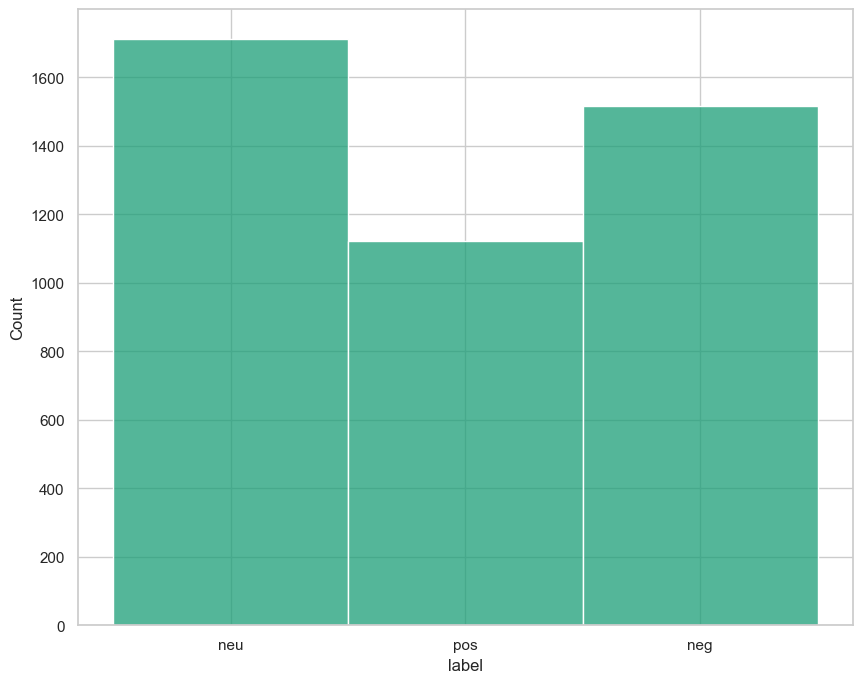

In [9]:
sns.histplot(all_posts_df.label);


In [28]:
#view posts based on the calculated labels
def post_title_output(df, label):
  res2 = df[df['label'] == label].post_title.values
  print(f'{"=" * 20}')
  print("\n".join(post_title for post_title in res2))

# randomly sample
post_sub = all_posts_df.groupby('label').sample(n = 5, random_state = 7)

print("Positive news")
post_title_output(post_sub, "pos")

print("\nNeutral news")
post_title_output(post_sub, "neu")

print("\nNegative news")
post_title_output(post_sub, "neg")

Positive news
Wind, solar fulfill 10% of global electricity demand for first time
If the FCC succeeds in dismantling net neutrality, it’ll be up to organisations like the EFF to mount a legal challenge. Now more than ever, it’s time to donate to the EFF!
"The Pirate Bay Can't Be Stopped ," Co-Founder Says • TorrentFreak
Penn State accepting applications for first master's in artificial intelligence
An artificial intelligence system should be recognized as the inventor of two ideas in patents filed on its behalf, a team of UK academics says

Neutral news
You shall not pinch to zoom: Rittenhouse trial judge disallows basic iPad feature
European Union rules all smartphones will require the same charger from 2024
Ethereum loses nearly a quarter of its value over the past week
A Device That 'Prints' New Skin Right Onto Burns Just Passed Another Animal Trial
Brazil halts sales of charger-less iPhones, fines Apple $2.3 million

Negative news
Fueling the Fire: How Social Media Intensifies U.S.

In [10]:
stop_words = ["a","able","about","above","abst","accordance","according","accordingly","across","act","actually","added","adj","affected","affecting","affects","after","afterwards","again","against","ah","all","almost","alone","along","already","also","although","always","am","among","amongst","an","and","announce","another","any","anybody","anyhow","anymore","anyone","anything","anyway","anyways","anywhere","apparently","approximately","are","aren","arent","arise","around","as","aside","ask","asking","at","auth","available","away","awfully","b","back","be","became","because","become","becomes","becoming","been","before","beforehand","begin","beginning","beginnings","begins","behind","being","believe","below","beside","besides","between","beyond","biol","both","brief","briefly","but","by","c","ca","came","can","cannot","cause","causes","certain","certainly","co","com","come","comes","contain","containing","contains","could","couldnt","d","date","did","different","do","does","doing","done","down","downwards","due","during","e","each","ed","edu","effect","eg","eight","eighty","either","else","elsewhere","end","ending","enough","especially","et","etc","even","ever","every","everybody","everyone","everything","everywhere","ex","except","f","far","few","ff","fifth","first","five","fix","followed","following","follows","for","former","formerly","forth","found","four","from","further","furthermore","g","gave","get","gets","getting","give","given","gives","giving","go","goes","gone","got","gotten","h","had","happens","hardly","has","have","having","he","hed","hence","her","here","hereafter","hereby","herein","heres","hereupon","hers","herself","hes","hi","hid","him","himself","his","hither","home","how","howbeit","however","hundred","i","id","ie","if","im","immediate","immediately","importance","important","in","inc","indeed","index","information","instead","into","invention","inward","is","it","itd","its","itself","j","just","k","keep","keeps","kept","kg","km","know","known","knows","l","largely","last","lately","later","latter","latterly","least","less","lest","let","lets","like","liked","likely","line","little","look","looking","looks","ltd","m","made","mainly","make","makes","many","may","maybe","me","mean","means","meantime","meanwhile","merely","mg","might","million","miss","ml","more","moreover","most","mostly","mr","mrs","much","mug","must","my","myself","n","na","name","namely","nay","nd","near","nearly","necessarily","necessary","need","needs","neither","never","nevertheless","new","next","nine","ninety","no","nobody","non","none","nonetheless","noone","nor","normally","nos","not","noted","nothing","now","nowhere","o","obtain","obtained","obviously","of","off","often","oh","ok","okay","old","omitted","on","once","one","ones","only","onto","or","ord","other","others","otherwise","ought","our","ours","ourselves","out","outside","over","overall","owing","own","p","page","pages","part","particular","particularly","past","per","perhaps","placed","please","plus","poorly","possible","possibly","potentially","pp","predominantly","present","previously","primarily","probably","promptly","proud","provides","put","q","que","quickly","quite","qv","r","ran","rather","rd","re","readily","really","recent","recently","ref","refs","regarding","regardless","regards","related","relatively","research","respectively","resulted","resulting","results","right","run","s","said","same","saw","say","saying","says","sec","section","see","seeing","seem","seemed","seeming","seems","seen","self","selves","sent","seven","several","shall","she","shed","shes","should","show","showed","shown","showns","shows","significant","significantly",
               "similar","similarly","since","six","slightly","so","some","somebody","somehow","someone","somethan","something","sometime","sometimes","somewhat","somewhere","soon","sorry","specifically","specified","specify","specifying","still","stop","strongly","sub","substantially","successfully","such","sufficiently","suggest","sup","sure","t","take","taken","taking","tell","tends","th","than","thank","thanks","thanx","that","thats","the","their","theirs","them","themselves","then","thence","there","thereafter","thereby","thered","therefore","therein","thereof","therere","theres","thereto","thereupon","these","they","theyd","theyre","think","this","those","thou","though","thoughh","thousand","throug","through","throughout","thru","thus","til","tip","to","together","too","took","toward","towards","tried","tries","truly","try","trying","ts","twice","two","u","un","under","unfortunately","unless","unlike","unlikely","until","unto","up","upon","ups","us","use","used","useful","usefully","usefulness","uses","using","usually","v","value","various","very","via","viz","vol","vols","vs","w","want","wants","was","wasnt","way","we","wed","welcome","went","were","werent","we've","what","whatever","whats","when","whence","whenever","where","whereafter","whereas","whereby","wherein","wheres","whereupon","wherever","whether","which","while","whim","whither","who","whod","whoever","whole","whom","whomever","whos","whose","why","widely","willing","wish","with","within","without","wont","words","world","would","wouldnt","www","x","y","yes","yet","you","youd","your","youre","yours","yourself","yourselves","z","zero"]

In [11]:
def custom_tokenize(text):
  # remove single quote and dashes
  text = text.replace("'", "").replace("-", "").lower()

  # split on words only
  tk = nltk.tokenize.RegexpTokenizer(r'\w+')
  tokens = tk.tokenize(text)

  # remove stop words
  words = [w for w in tokens if not w in stop_words]
  return words



In [12]:
def tokens_2_words(df, label):
  # subset titles based on label
  titles = df[df['label'] == label].cleaned_title
  # apply our custom tokenize function to each title
  tokens = titles.apply(custom_tokenize)
  # join nested lists into a single list
  words = list(chain.from_iterable(tokens))
  return words

pos_words = tokens_2_words(all_posts_df, 'pos')
neg_words = tokens_2_words(all_posts_df, 'neg')


In [40]:
#Visualize tokens
#Top n words

pos_freq = nltk.FreqDist(pos_words)
pos_freq.most_common(70)


[('intelligence', 146),
 ('artificial', 141),
 ('energy', 85),
 ('net', 64),
 ('neutrality', 62),
 ('year', 58),
 ('help', 56),
 ('time', 53),
 ('create', 50),
 ('ai', 50),
 ('medium', 48),
 ('internet', 48),
 ('social', 43),
 ('free', 43),
 ('power', 41),
 ('scientist', 41),
 ('solar', 40),
 ('company', 39),
 ('fcc', 38),
 ('machine', 37),
 ('clean', 35),
 ('find', 34),
 ('space', 34),
 ('datum', 34),
 ('robot', 34),
 ('google', 32),
 ('human', 31),
 ('battery', 31),
 ('billion', 30),
 ('develop', 29),
 ('plan', 28),
 ('amazon', 28),
 ('user', 28),
 ('good', 26),
 ('tesla', 26),
 ('bill', 26),
 ('apple', 26),
 ('privacy', 26),
 ('support', 25),
 ('researcher', 25),
 ('facebook', 25),
 ('renewable', 25),
 ('phone', 25),
 ('state', 24),
 ('day', 24),
 ('learning', 24),
 ('save', 24),
 ('work', 23),
 ('electric', 23),
 ('people', 22),
 ('system', 22),
 ('musk', 22),
 ('china', 21),
 ('big', 21),
 ('tech', 21),
 ('share', 21),
 ('well', 21),
 ('car', 21),
 ('build', 21),
 ('report', 20),


In [37]:
neg_freq = nltk.FreqDist(neg_words)
neg_freq.most_common(60)

[('medium', 138),
 ('social', 137),
 ('net', 133),
 ('neutrality', 130),
 ('ban', 120),
 ('fcc', 102),
 ('company', 77),
 ('kill', 74),
 ('datum', 62),
 ('internet', 62),
 ('year', 61),
 ('user', 56),
 ('facebook', 55),
 ('google', 55),
 ('people', 54),
 ('fake', 52),
 ('apple', 52),
 ('tesla', 52),
 ('bill', 51),
 ('find', 49),
 ('time', 49),
 ('call', 45),
 ('pay', 44),
 ('tech', 43),
 ('lose', 42),
 ('scientist', 42),
 ('report', 41),
 ('anti', 38),
 ('amazon', 37),
 ('police', 37),
 ('block', 37),
 ('law', 37),
 ('cancer', 36),
 ('plan', 36),
 ('cut', 35),
 ('broadband', 35),
 ('trump', 35),
 ('rule', 34),
 ('fire', 34),
 ('ai', 33),
 ('leak', 33),
 ('ceo', 32),
 ('worker', 32),
 ('attack', 32),
 ('big', 32),
 ('bad', 32),
 ('work', 31),
 ('robot', 31),
 ('phone', 30),
 ('app', 30),
 ('iphone', 29),
 ('china', 29),
 ('steal', 28),
 ('microsoft', 28),
 ('billion', 28),
 ('drone', 28),
 ('machine', 27),
 ('die', 27),
 ('fight', 27),
 ('twitter', 27)]

In [13]:
# Word Clouds
def plot_word_cloud(words, colormap, stopwords = [], max_words = 100):
  text = " ".join(word for word in words)
  # generate word cloud 
  wordcloud = WordCloud(width=1000, height = 600,
                        max_words = max_words,
                        colormap=colormap,
                        stopwords = stopwords,
                        background_color="black").generate(text)

  # Display the generated image:
  plt.figure( figsize=(20,10), facecolor='k' )
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off");

In [14]:
def extract_sentence_from_word(df, word, label, num = 5):
  contains_word = all_posts_df['post_title'].str.contains(r"\b{}\b".format(word), case=False) # matches the word only
  label_type = all_posts_df['label'] == label
  sent_list = all_posts_df.loc[contains_word & label_type].post_title.values
  print("\n".join(sent for sent in sent_list[:num]))

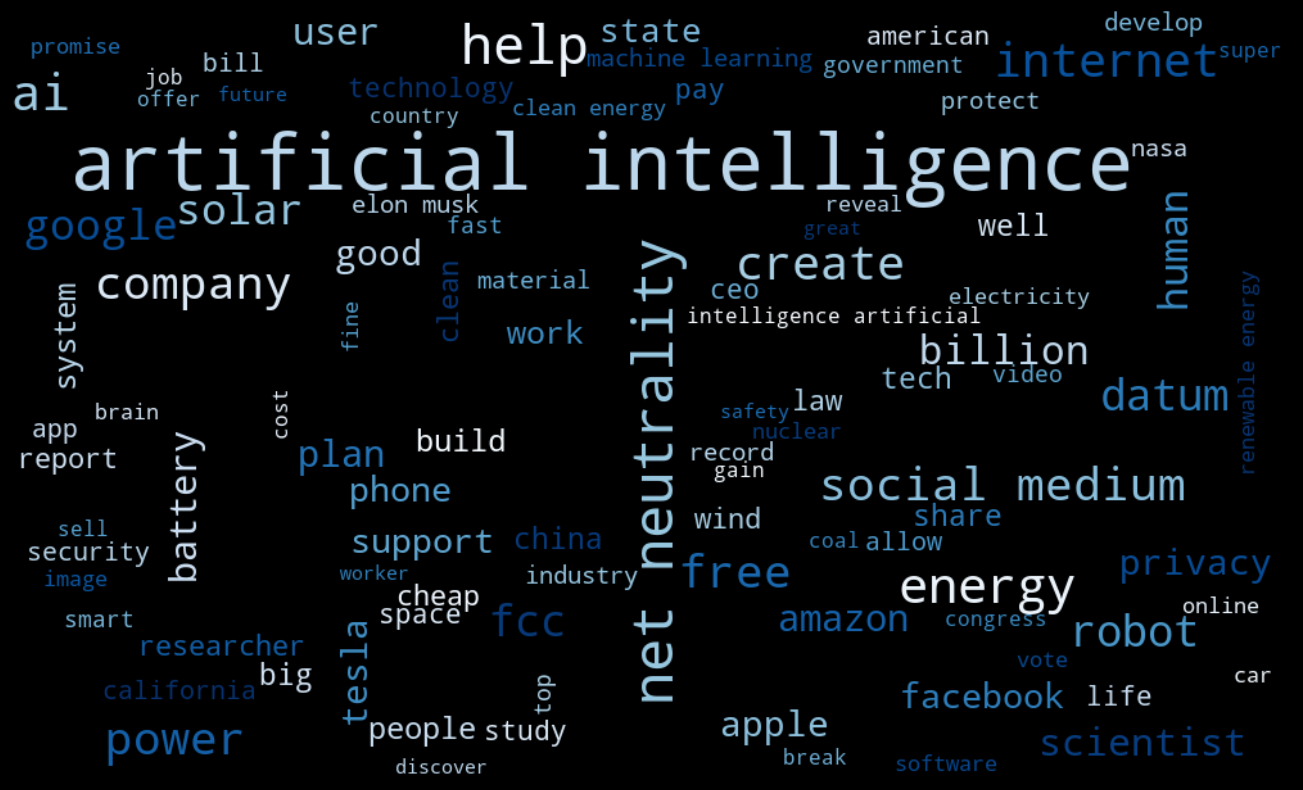

In [15]:
custom_stopwords = ["save", "day", "find", "time", "year", "call"]
plot_word_cloud(pos_words, "Blues", custom_stopwords)

In [18]:
extract_sentence_from_word(all_posts_df, "elon musk", "pos")

Twitter to accept Elon Musk’s $45 billion bid to buy company
Germany's biggest auto union questions Elon Musk's authority to give a return-to-office ultimatum: 'An employer cannot dictate the rules just as he likes'
Elon Musk's SpaceX and Tesla get far more government money than NPR — Musk, too, is the beneficiary of public-private partnerships
Elon Musk apologises to sacked Twitter worker over online row
Here's Elon Musk's Plan to Power the USA on Solar Energy: "you only need about 100 miles by 100 miles of solar panels to power the entire United States"


In [48]:
extract_sentence_from_word(all_posts_df, "solar", "pos")

Using artificial intelligence and advanced cameras to understand and monitor solar project effects on birds.
Trump’s energy plan doesn’t mention solar, an industry that just added 51,000 jobs
Here's Elon Musk's Plan to Power the USA on Solar Energy: "you only need about 100 miles by 100 miles of solar panels to power the entire United States"
Shell buying spree cranks up race for clean energy - “spent over $400 million on a range of acquisitions in recent weeks, from solar power to electric car charging points, cranking up its drive to expand beyond its oil and gas business and reduce its carbon footprint.”
Flexible solar panel sticks to roofs with low weight bearing capacity, no racking, 20.9% efficiency


In [56]:
extract_sentence_from_word(all_posts_df, "energy", "pos")

Newly discovered enzyme that turns air into electricity, providing a new clean source of energy
Ethereum will use less energy now that it’s proof-of-stake
Study Finds World Can Switch to 100% Renewable Energy and Earn Back Its Investment in Just 6 Years
Denmark wants to build two energy islands to supply more renewable energy to Europe
Nuclear should be considered part of clean energy standard, White House says


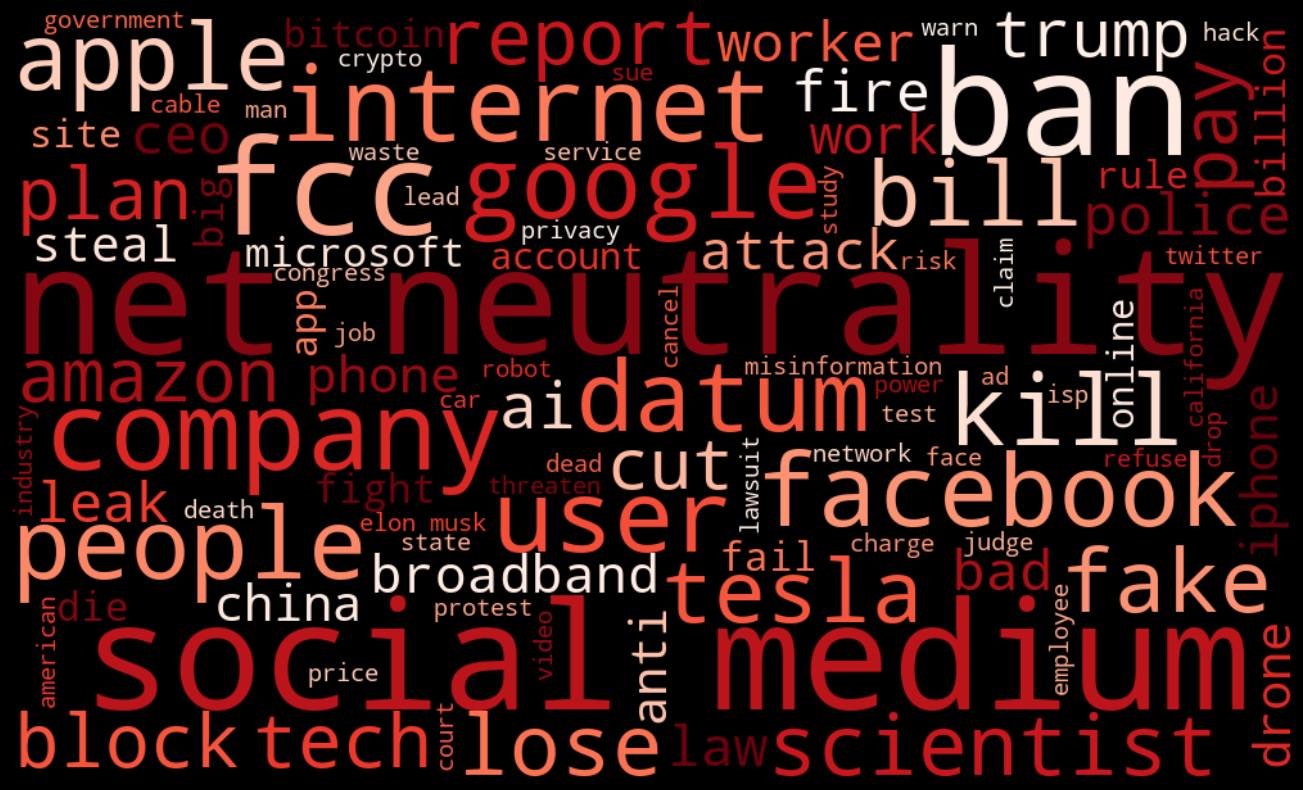

In [57]:
plot_word_cloud(neg_words, "Reds", custom_stopwords)

In [53]:
extract_sentence_from_word(all_posts_df, "internet", "neg")

FBI arrests man for plan to kill 70% of Internet in AWS bomb attack
In high poverty L.A. neighborhoods, the poor pay more for internet service that delivers less
China's Fiber Broadband Internet Approaches Nationwide Coverage; United States Lags Severely Behind
Comcast stock falls as company fails to add Internet users for first time ever
The Destruction of Gaza’s Internet Is Complete


In [58]:
extract_sentence_from_word(all_posts_df, "google", "neg")

Last night Googles's domain for Argentina expired and a guy from Argentina bought google.com.ar for $4 leading to a country wide block of the site for several hours.
Google Deletes 100,000 Negative Reviews of Robinhood App From Angry Users
‘Godfather of AI’ quits Google with regrets and fears about his life’s work
Teen bought Google ad for his scam website and made 48 Bitcoins duping UK online shoppers
A year long study shows what you've suspected: Google Search is getting worse.


In [59]:
extract_sentence_from_word(all_posts_df, "fcc", "neg")


FCC orders carriers to stop delivering auto warranty robocalls
The FCC just repealed a 42-year-old rule blocking broadcast media mergers
Ajit Pai loses in court—FCC can’t kill broadband subsidy in Tribal areas
FCC threatens to block calls from carriers for letting robocalls run rampant
Clarence Thomas regrets ruling used by Ajit Pai to kill net neutrality | Thomas says he was wrong in Brand X case that helped FCC deregulate broadband.
